C:\Users\sande\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


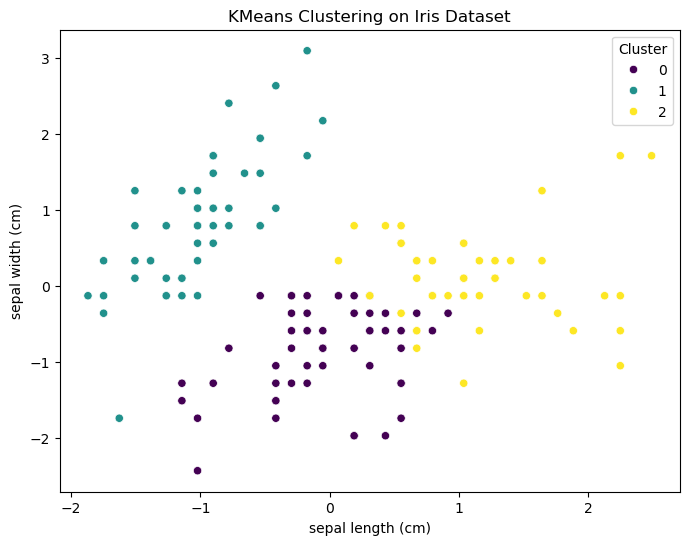

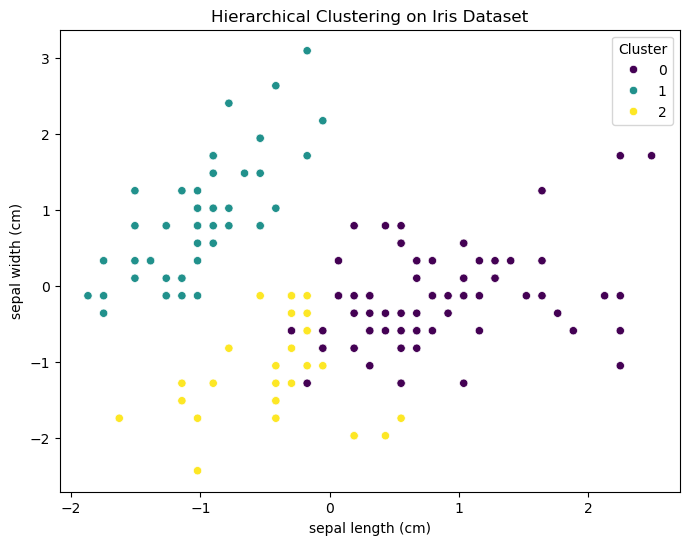

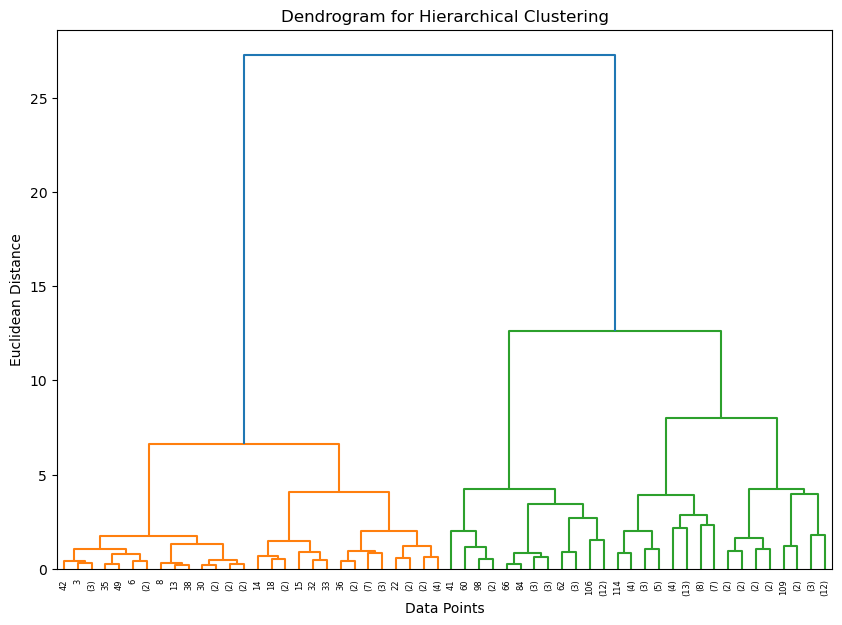

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Objective

# 1. Loading and Preprocessing (1 mark)
# Load the Iris dataset
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Drop the species column (not needed for clustering)
# Note: The species column is not included in iris.data

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 2. Clustering Algorithm Implementation 

## A) KMeans Clustering 
"""
KMeans clustering is a centroid-based algorithm that partitions the dataset into K clusters. 
It iteratively assigns data points to the nearest cluster center and updates the centroids until convergence.

Why KMeans is suitable for the Iris dataset:
- The dataset has well-separated clusters, making KMeans effective.
- It efficiently groups similar flowers based on their features.
"""

# Applying KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Visualizing KMeans Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=kmeans_labels, palette='viridis')
plt.title("KMeans Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(title='Cluster')
plt.show()

## B) Hierarchical Clustering (4 marks)
"""
Hierarchical clustering is a tree-based method that builds a hierarchy of clusters using either agglomerative or divisive approaches.
The algorithm merges or splits clusters iteratively based on similarity.

Why Hierarchical Clustering is suitable for the Iris dataset:
- It provides a dendrogram, allowing better insight into the cluster relationships.
- No need to specify the number of clusters in advance.
"""

# Applying Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(data_scaled)

# Visualizing Hierarchical Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=hierarchical_labels, palette='viridis')
plt.title("Hierarchical Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(title='Cluster')
plt.show()

# Dendrogram for Hierarchical Clustering
linked = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()